In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('911 data set.csv')

In [7]:
# Question 1: 
top_zipcodes = data['zip'].value_counts().head(10)
print("Top 10 Zipcodes:", top_zipcodes)
print("19446 present:", 19446 in data['zip'].values)
print("19090 present:", 19090 in data['zip'].values)

Top 10 Zipcodes: zip
19401.0    15581
19464.0    15195
19403.0    11396
19446.0    10837
19406.0     7435
19002.0     7080
19468.0     6655
19454.0     6153
19046.0     6134
19090.0     5943
Name: count, dtype: int64
19446 present: True
19090 present: True


In [9]:
# Question 2: 
top_townships = data['twp'].value_counts().head(4)
print("Top 4 Townships:", top_townships)
missing_townships = ['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON']
for township in missing_townships:
    print(f"{township} present:", township in data['twp'].values)

Top 4 Townships: twp
LOWER MERION    19294
ABINGTON        13778
NORRISTOWN      13034
UPPER MERION    11797
Name: count, dtype: int64
LOWER POTTSGROVE present: True
NORRISTOWN present: True
HORSHAM present: True
ABINGTON present: True


In [11]:
# Question 3:
data['Reason'] = data['title'].apply(lambda x: x.split(':')[0])
reason_counts = data['Reason'].value_counts()
print("Most common Reason:", reason_counts.idxmax(), reason_counts.max())
print("Second common Reason:", reason_counts.index[1], reason_counts.iloc[1])

Most common Reason: EMS 112515
Second common Reason: Traffic 79293


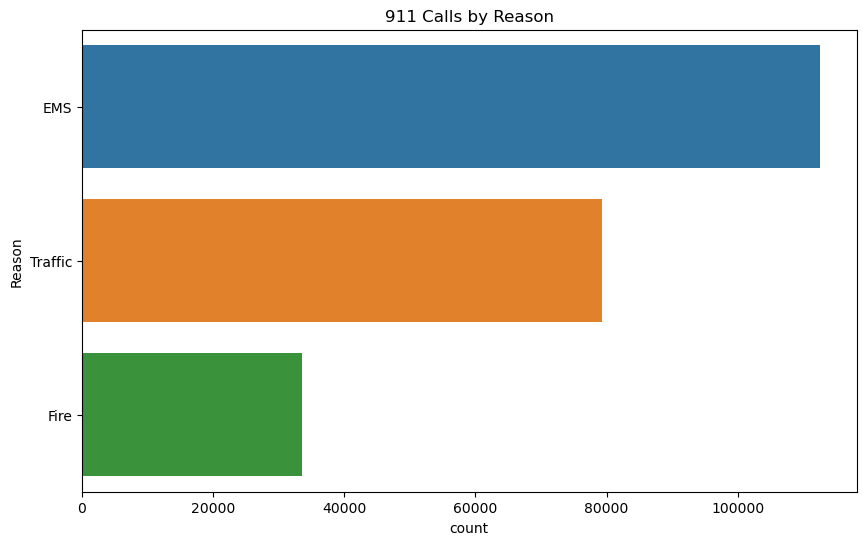

In [13]:
# Question 4: 
plt.figure(figsize=(10, 6))
sns.countplot(y='Reason', data=data, order=reason_counts.index)
plt.title('911 Calls by Reason')
plt.show()

In [15]:

# Question 5:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
data['DayOfWeek'] = data['timeStamp'].dt.day_name()
ems_calls = data[data['Reason'] == 'EMS']
max_day = ems_calls['DayOfWeek'].value_counts().idxmax()
max_calls = ems_calls['DayOfWeek'].value_counts().max()
print("Day with maximum EMS calls:", max_day, max_calls)

Day with maximum EMS calls: Friday 16729


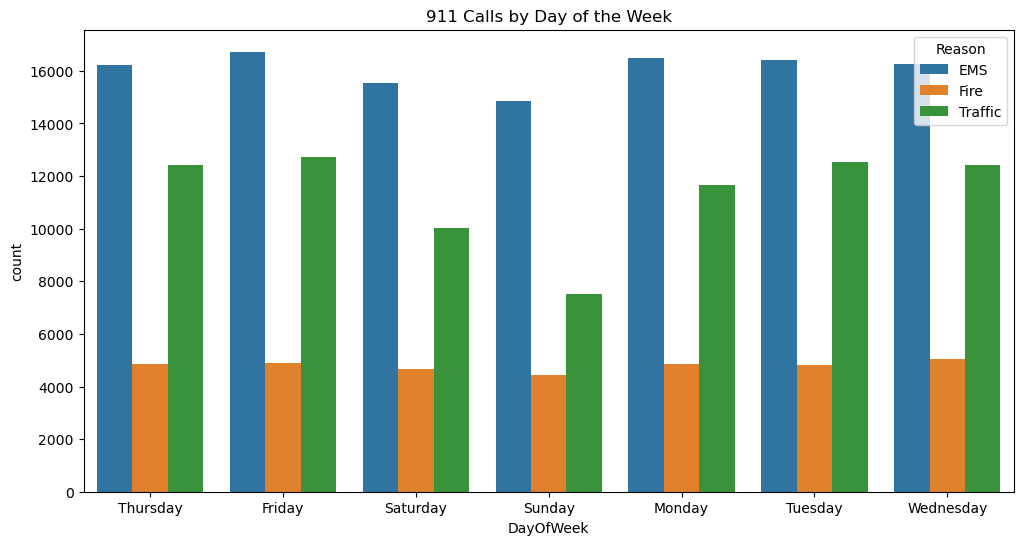

In [17]:
# Question 6: 
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=data, hue='Reason')
plt.legend(title='Reason')
plt.title('911 Calls by Day of the Week')
plt.show()



In [19]:

traffic_calls = data[data['Reason'] == 'Traffic']
lowest_traffic_day = traffic_calls['DayOfWeek'].value_counts().idxmin()
print("Day with lowest traffic calls:", lowest_traffic_day)

Day with lowest traffic calls: Sunday


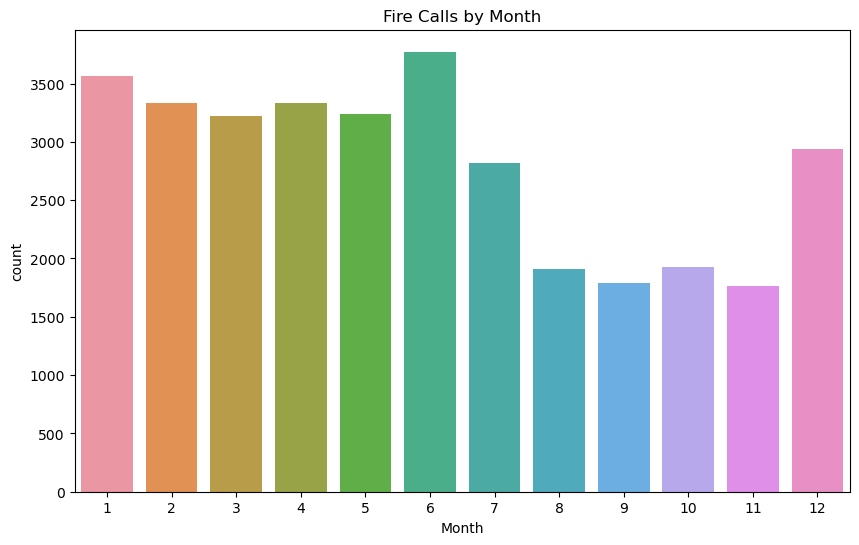

Month with highest Fire calls: 6


In [21]:
# Question 7:
data['Month'] = data['timeStamp'].dt.month
fire_calls = data[data['Reason'] == 'Fire']
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=fire_calls)
plt.title('Fire Calls by Month')
plt.show()

highest_fire_month = fire_calls['Month'].value_counts().idxmax()
print("Month with highest Fire calls:", highest_fire_month)


In [23]:
# Question 8: 
import folium

In [25]:

m = folium.Map(location=[data['lat'].mean(), data['lng'].mean()], zoom_start=10)


traffic_data = data[data['Reason'] == 'Traffic'].dropna(subset=['lat', 'lng'])
for idx, row in traffic_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Saving the map
m.save('traffic_calls_map.html')
print("Web Map saved as traffic_calls_map.html")


Web Map saved as traffic_calls_map.html
